<h4>Abeeha</h4>
<br>
<h4>L1F18BSCS7204</h4>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

<h5>Reading Dataset</h5>

In [3]:
path = "heart_failure.csv" 

In [4]:
heartdf = pd.read_csv(path) # Read csv file?
heartdf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


<h5>Checking for missing Values in  Dateset</h5>

In [5]:
heartdf.isnull().sum()#We dont have Null values in our Dataset so we dont need to do Data-Wrangling

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
heartdf.dtypes #Checking DataType of Dataset Columns our data is Normalized we dont need to change or normalize data types

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

<h3>Drop Time Column</h3>

In [7]:
heartdf.drop(['time'], axis='columns', inplace=True)
heartdf.reset_index(drop=True, inplace=True)
heartdf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


In [8]:
print("Shape of data: ",heartdf.shape)#It shows shape (no of rows and column)

Shape of data:  (299, 12)


<h4>Question no 1<br>At what age most of the death event happens in heart attack 
patients?</h4>

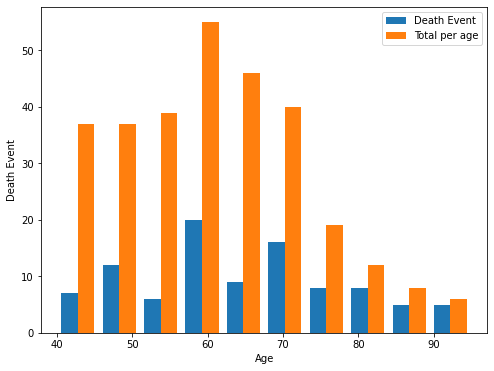

In [9]:
attack = heartdf[heartdf['DEATH_EVENT'] == 1].age
age = heartdf.age

plt.figure(figsize=(8,6))
plt.xlabel('Age')
plt.ylabel('Death Event')
plt.hist([attack, age], label=['Death Event', 'Total per age'])
plt.legend()

<h6>From Histogram we conclude that most of the Death Events Occurs at the Age of 60 </h6><br>

<h4>Question no 2<br>What is the proportion of Death events in patients who had, diabetes 
and high blood pressure?</h4>

<AxesSubplot:xlabel='diabetes', ylabel='count'>

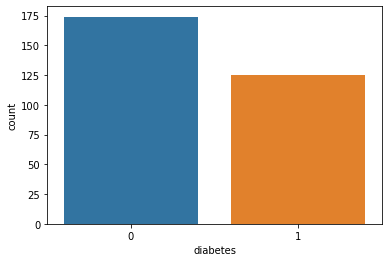

In [10]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(heartdf['diabetes'])

<AxesSubplot:xlabel='diabetes', ylabel='age'>

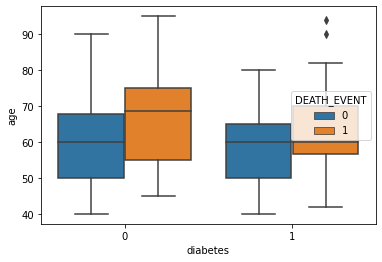

In [11]:
sns.boxplot(x='diabetes', y="age", hue = "DEATH_EVENT", data=heartdf)

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

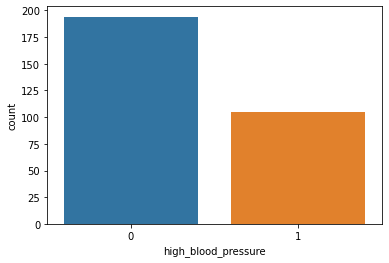

In [12]:
sns.countplot(heartdf['high_blood_pressure'])

<AxesSubplot:xlabel='high_blood_pressure', ylabel='serum_sodium'>

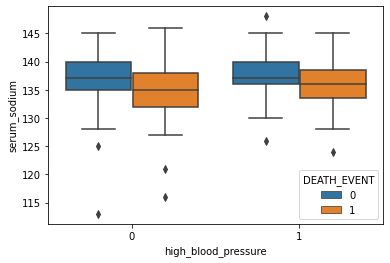

In [13]:
sns.boxplot(x='high_blood_pressure', y="serum_sodium",hue = 'DEATH_EVENT', data=heartdf)

<h4>Question no 3<br>In which Gender Death Event occur Most?
</h4>

<AxesSubplot:xlabel='sex', ylabel='age'>

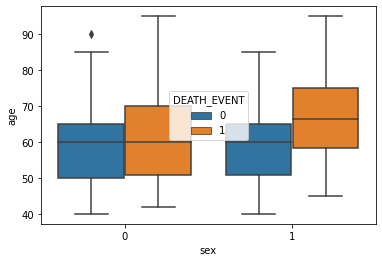

In [14]:
sns.boxplot(x='sex', y="age", hue = "DEATH_EVENT", data=heartdf)

<h4>Question no 4<br>What are the Creatinine Phosphokinase
level of a person and chances of death event?
</h4>

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='creatinine_phosphokinase'>

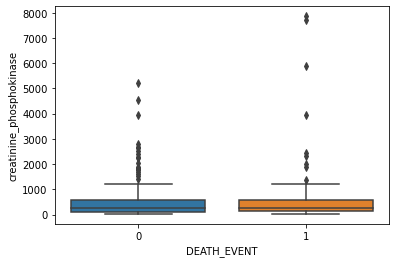

In [20]:
sns.boxplot(x='DEATH_EVENT', y="creatinine_phosphokinase", data=heartdf)

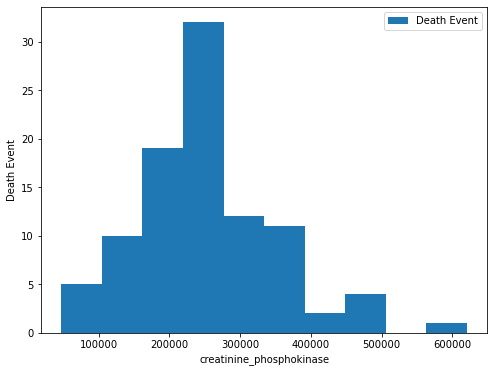

In [16]:
plat = heartdf[heartdf['DEATH_EVENT'] == 1].platelets

plt.figure(figsize=(8,6))
plt.xlabel('creatinine_phosphokinase')
plt.ylabel('Death Event')
plt.hist(plat, label=['Death Event'])
plt.legend()

<h4>Question no 5<br>What are the Serum Sodium level for a normal person and for a 
heart attack patient?
</h4>


<AxesSubplot:xlabel='high_blood_pressure', ylabel='serum_sodium'>

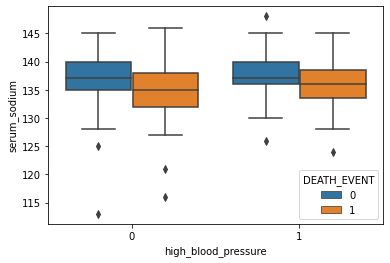

In [17]:
sns.boxplot(x='high_blood_pressure', y="serum_sodium",hue = 'DEATH_EVENT', data=heartdf)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_sodium'>

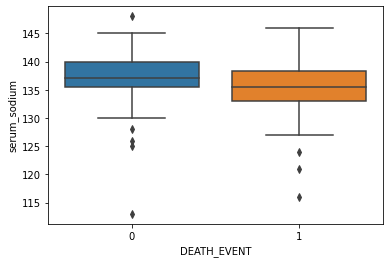

In [30]:
sns.boxplot(x='DEATH_EVENT', y="serum_sodium", data=heartdf)